In [1]:
%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torchvision
from torchvision import models
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm
from PIL import Image
from collections import Counter
from sklearn.metrics import jaccard_score
import pickle

In [2]:
SAVE_DIR  = '/data/model'


In [3]:
def load_iou(model_name='deeplab100'):

    save = os.path.join(SAVE_DIR,model_name+'_loss_train.npy')
    loss_train = np.load(save)
    save = os.path.join(SAVE_DIR,model_name+'_loss_test.npy')
    loss_test = np.load(save)
    save = os.path.join(SAVE_DIR,model_name+'_iou_train.npy')
    iou_train = np.load(save)
    save = os.path.join(SAVE_DIR,model_name+'_iou_test.npy')
    iou_test = np.load(save)
    
    return loss_train,loss_test,iou_train,iou_test

In [4]:
loss_train100,loss_test100,iou_train100,iou_test100 = load_iou(model_name='deeplab100')
loss_train10,loss_test10,iou_train10,iou_test10 = load_iou(model_name='deeplab10')
loss_train20,loss_test20,iou_train20,iou_test20 = load_iou(model_name='deeplab20')
loss_train30,loss_test30,iou_train30,iou_test30 = load_iou(model_name='deeplab30')
loss_train50,loss_test50,iou_train50,iou_test50 = load_iou(model_name='deeplab50')

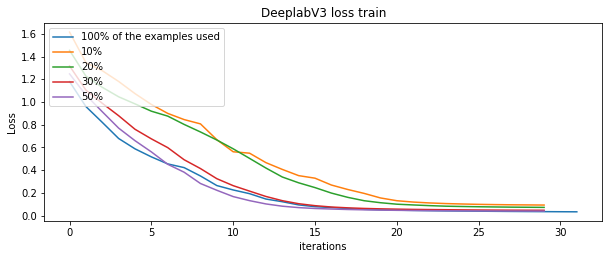

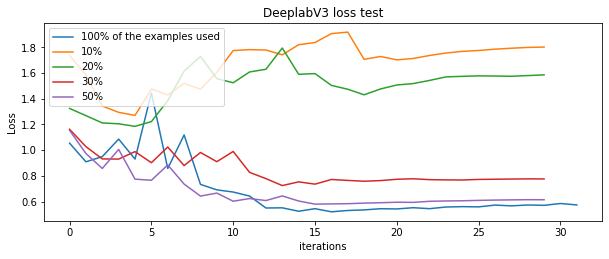

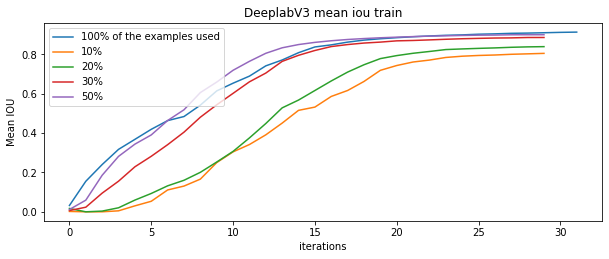

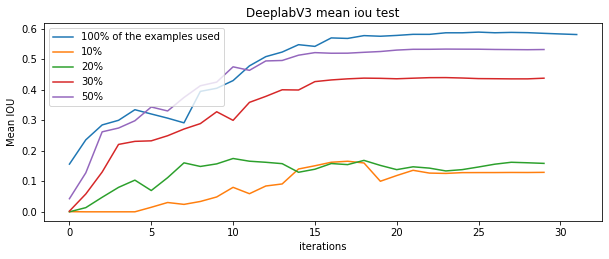

In [5]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.title("DeeplabV3 loss train")
plt.plot(loss_train100,label='100% of the examples used')
plt.plot(loss_train10,label='10%')
plt.plot(loss_train20,label='20%')
plt.plot(loss_train30,label='30%')
plt.plot(loss_train50,label='50%')
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend(loc="upper left")


plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.title("DeeplabV3 loss test")
plt.plot(loss_test100,label='100% of the examples used')
plt.plot(loss_test10,label='10%')
plt.plot(loss_test20,label='20%')
plt.plot(loss_test30,label='30%')
plt.plot(loss_test50,label='50%')
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend(loc="upper left")



plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.title("DeeplabV3 mean iou train")
plt.plot(iou_train100,label='100% of the examples used')
plt.plot(iou_train10,label='10%')
plt.plot(iou_train20,label='20%')
plt.plot(iou_train30,label='30%')
plt.plot(iou_train50,label='50%')
plt.xlabel("iterations")
plt.ylabel("Mean IOU")
plt.legend(loc="upper left")



plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.title("DeeplabV3 mean iou test")
plt.plot(iou_test100,label='100% of the examples used')
plt.plot(iou_test10,label='10%')
plt.plot(iou_test20,label='20%')
plt.plot(iou_test30,label='30%')
plt.plot(iou_test50,label='50%')
plt.xlabel("iterations")
plt.ylabel("Mean IOU")
plt.legend(loc="upper left")


In [11]:
iou_test10[29]

0.12935960120983298